# Classificação de imagens Sentinel-2/MSI para a identificação de campos de mineração

Este notebook apresenta os passos seguidos durante o desenvolvimento do trabalho da matéria de **Inteligência artificial** da Fatec SJC

O grupo que desenvolve este projeto é formado pelos seguintes alunos:
 - Carlos Neto;
 - Felipe Menino;
 - Mauricio Kyoshi;
 - Weslei Luiz.

In [1]:
import pandas as pd
import seaborn as sn
import functions.ClassificationUtils as utils
import matplotlib.pyplot as plt
import sklearn.neural_network as mlp
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Definindo constantes

In [2]:
# caminho para os dados
PATH_TREINO = "dados/treino/valores_unificados"
PATH_VALIDACAO = "dados/validacao/valores_unificados"
# lista com indexes das bandas
BANDS_INDEX = ["B8","B4","B3"]
# index com a coluna das classes
CLASSES_INDEX = ["classe"]
# classes existentes nos dados
CONFUSION_MATRIX_INDEX = ["mineracao", "vegetacao", "agua"]
# caminho para a imagem
IMAGE_VALIDATION = "/home/weslei/Documents/Workspaces/IA/Images/validacao"
IMAGE_VALIDATION_CROP = "/home/weslei/Documents/Workspaces/IA/Images/validacao_crop"

## Carregando dados para treino e teste

In [3]:
data = pd.read_csv(f"{PATH_TREINO}.csv", sep=",", encoding="UTF-8")

## Carregando imagens para classificação

In [4]:
test_image = utils.load_stacked_image(f"{IMAGE_VALIDATION}.tif")
test_crop_image = utils.load_stacked_image(f"{IMAGE_VALIDATION_CROP}.tif")

## Separa os dados para treino e teste

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[BANDS_INDEX], data[CLASSES_INDEX], test_size=0.30, random_state=50)

## Cria instância de MLPClassifier com os parâmetros:
- hidden_layer_sizes = Neurônios por camada oculta (cada item da tupla define uma camada);
- activation = Função de ativação;
- solver = Algoritmo de otimização dos pesos;
- batch_size = Quantidade de dados em cada grupo gerado que será apresentado para a rede em cada iteração;
- learning_rate = Como a alteração dos pesos é feita pela rede; 
- max_iter = Maximo de iterações, se a convergência da rede for atingida antes as iterações não continuarão;
- random_state = Fator para geração do número aletório;
- verbose = Logs das iterações;

## Teste 1 - Parâmetros padrão do sklearn

In [6]:
classifier_sklearn_default = mlp.MLPClassifier(verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [7]:
model_sklearn_default = classifier_sklearn_default.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.06195754
Iteration 2, loss = 0.99110110
Iteration 3, loss = 0.93070552
Iteration 4, loss = 0.86465002
Iteration 5, loss = 0.79262604
Iteration 6, loss = 0.71788567
Iteration 7, loss = 0.64362414
Iteration 8, loss = 0.57293720
Iteration 9, loss = 0.50685508
Iteration 10, loss = 0.44635676
Iteration 11, loss = 0.39186354
Iteration 12, loss = 0.34329674
Iteration 13, loss = 0.30064206
Iteration 14, loss = 0.26339141
Iteration 15, loss = 0.23120327
Iteration 16, loss = 0.20362224
Iteration 17, loss = 0.17994622
Iteration 18, loss = 0.15965197
Iteration 19, loss = 0.14247462
Iteration 20, loss = 0.12762238
Iteration 21, loss = 0.11498836
Iteration 22, loss = 0.10406131
Iteration 23, loss = 0.09487839
Iteration 24, loss = 0.08660047
Iteration 25, loss = 0.07961752
Iteration 26, loss = 0.07352436
Iteration 27, loss = 0.06819760
Iteration 28, loss = 0.06347079
Iteration 29, loss = 0.05942994
Iteration 30, loss = 0.05576565
Iteration 31, loss = 0.05244937
Iteration 32, los

### Verifica acuracia da rede

In [8]:
score_result = model_sklearn_default.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.997332147621165


### Tenta adivinhar quais pixels são agua e quais nao são

In [9]:
y_predict = model_sklearn_default.predict(X_test)

### Gera matriz de confusao

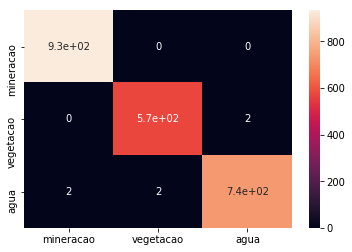

In [10]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


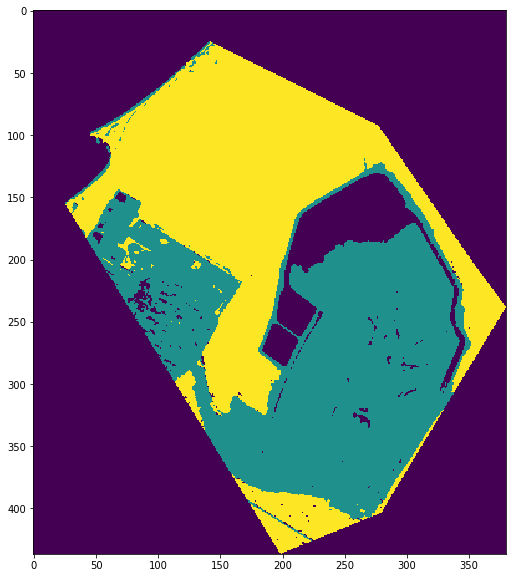

In [11]:
utils.plot_classified_image(test_image, model_sklearn_default, BANDS_INDEX, figsize=(10,10))

## Teste 2 - Variação incial dos parametros default da documentação do [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) - hidden_layer_sizes, activation, solver, batch_size, learning_rate, random_state

In [12]:
classifier = mlp.MLPClassifier(
    hidden_layer_sizes = (100, 100),
    activation = "tanh",
    solver="sgd",
    batch_size=41,
    learning_rate="adaptive",
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [13]:
model_default = classifier.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.05467437
Iteration 2, loss = 0.96823853
Iteration 3, loss = 0.88526645
Iteration 4, loss = 0.78970741
Iteration 5, loss = 0.68318305
Iteration 6, loss = 0.57433497
Iteration 7, loss = 0.47451701
Iteration 8, loss = 0.39065670
Iteration 9, loss = 0.32337910
Iteration 10, loss = 0.27001894
Iteration 11, loss = 0.22752591
Iteration 12, loss = 0.19361302
Iteration 13, loss = 0.16632150
Iteration 14, loss = 0.14406900
Iteration 15, loss = 0.12608892
Iteration 16, loss = 0.11139705
Iteration 17, loss = 0.09923148
Iteration 18, loss = 0.08933318
Iteration 19, loss = 0.08100896
Iteration 20, loss = 0.07408362
Iteration 21, loss = 0.06816864
Iteration 22, loss = 0.06322115
Iteration 23, loss = 0.05888381
Iteration 24, loss = 0.05517624
Iteration 25, loss = 0.05199083
Iteration 26, loss = 0.04916631
Iteration 27, loss = 0.04670041
Iteration 28, loss = 0.04451092
Iteration 29, loss = 0.04261881
Iteration 30, loss = 0.04086670
Iteration 31, loss = 0.03928727
Iteration 32, los

### Verifica acuracia da rede

In [14]:
score_result = model_default.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.9959982214317474


### Tenta adivinhar quais pixels são agua e quais nao são

In [15]:
y_predict = model_default.predict(X_test)

### Gera matriz de confusao

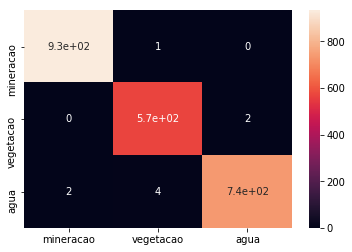

In [16]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

Predicting data...
Preparing data for plot


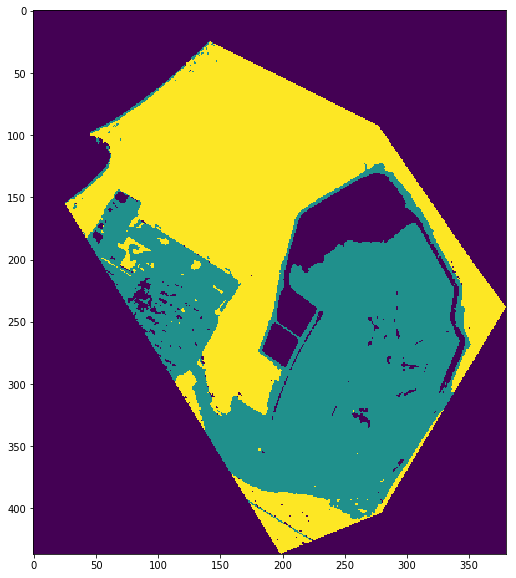

In [17]:
utils.plot_classified_image(test_image, model_default, BANDS_INDEX, figsize=(10,10))

## Teste 3 - Variação na função de ativação (activation)

In [18]:
classifier_a = mlp.MLPClassifier(
    hidden_layer_sizes = (100, 100),
    activation = "identity",
    solver="sgd",
    batch_size=41,
    learning_rate="adaptive",
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [19]:
model_a = classifier_a.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.05207947
Iteration 2, loss = 0.95901638
Iteration 3, loss = 0.86863988
Iteration 4, loss = 0.76562519
Iteration 5, loss = 0.65346984
Iteration 6, loss = 0.54264661
Iteration 7, loss = 0.44441530
Iteration 8, loss = 0.36386902
Iteration 9, loss = 0.30017221
Iteration 10, loss = 0.25004847
Iteration 11, loss = 0.21037302
Iteration 12, loss = 0.17891446
Iteration 13, loss = 0.15375390
Iteration 14, loss = 0.13333012
Iteration 15, loss = 0.11690118
Iteration 16, loss = 0.10352263
Iteration 17, loss = 0.09244628
Iteration 18, loss = 0.08346813
Iteration 19, loss = 0.07590399
Iteration 20, loss = 0.06962043
Iteration 21, loss = 0.06423205
Iteration 22, loss = 0.05973692
Iteration 23, loss = 0.05577581
Iteration 24, loss = 0.05238177
Iteration 25, loss = 0.04948418
Iteration 26, loss = 0.04688708
Iteration 27, loss = 0.04462097
Iteration 28, loss = 0.04261528
Iteration 29, loss = 0.04087964
Iteration 30, loss = 0.03925949
Iteration 31, loss = 0.03779940
Iteration 32, los

### Verifica acuracia da rede

In [20]:
score_result = model_a.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.9959982214317474


### Tenta adivinhar quais pixels são agua e quais nao são

In [21]:
y_predict = model_a.predict(X_test)

### Gera matriz de confusao

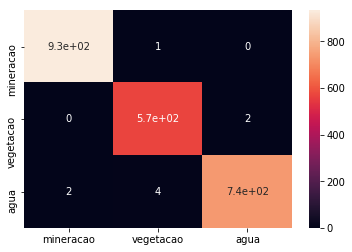

In [22]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


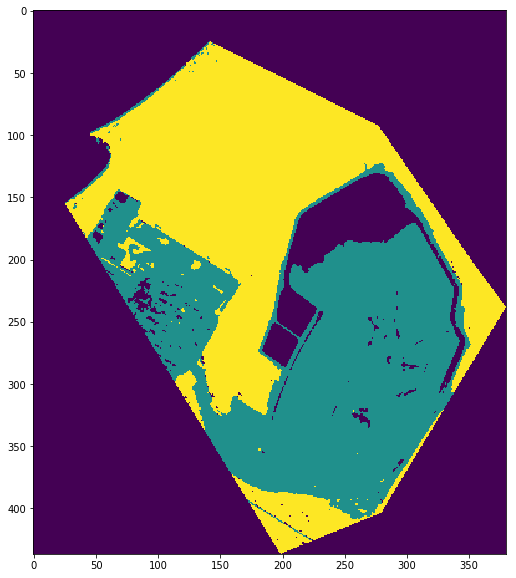

In [23]:
utils.plot_classified_image(test_image, model_a, BANDS_INDEX, figsize=(10,10))

## Teste 4 - Variação na função de otimização (solver)

In [24]:
classifier_s = mlp.MLPClassifier(
    hidden_layer_sizes = (100, 100), 
    activation = "tanh",
    solver="adam",
    batch_size=41,
    learning_rate="adaptive",
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [25]:
model_s = classifier_s.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.44899851
Iteration 2, loss = 0.04409747
Iteration 3, loss = 0.02330378
Iteration 4, loss = 0.01871908
Iteration 5, loss = 0.01533233
Iteration 6, loss = 0.01424824
Iteration 7, loss = 0.01286197
Iteration 8, loss = 0.01250822
Iteration 9, loss = 0.01128188
Iteration 10, loss = 0.01097319
Iteration 11, loss = 0.01019777
Iteration 12, loss = 0.00937614
Iteration 13, loss = 0.00877664
Iteration 14, loss = 0.00973671
Iteration 15, loss = 0.00800573
Iteration 16, loss = 0.00776878
Iteration 17, loss = 0.00816913
Iteration 18, loss = 0.00736142
Iteration 19, loss = 0.00728400
Iteration 20, loss = 0.00772986
Iteration 21, loss = 0.00679205
Iteration 22, loss = 0.00637663
Iteration 23, loss = 0.00842610
Iteration 24, loss = 0.00584730
Iteration 25, loss = 0.00741625
Iteration 26, loss = 0.00757093
Iteration 27, loss = 0.00625605
Iteration 28, loss = 0.00695833
Iteration 29, loss = 0.00695562
Iteration 30, loss = 0.00709059
Iteration 31, loss = 0.00723997
Iteration 32, los

### Verifica acuracia da rede

In [26]:
score_result = model_s.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.9968875055580257


### Tenta adivinhar quais pixels são agua e quais nao são

In [27]:
y_predict = model_s.predict(X_test)

### Gera matriz de confusao

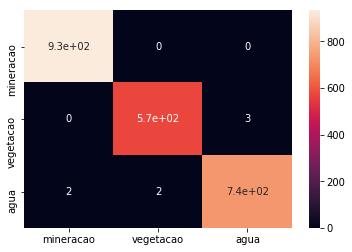

In [28]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


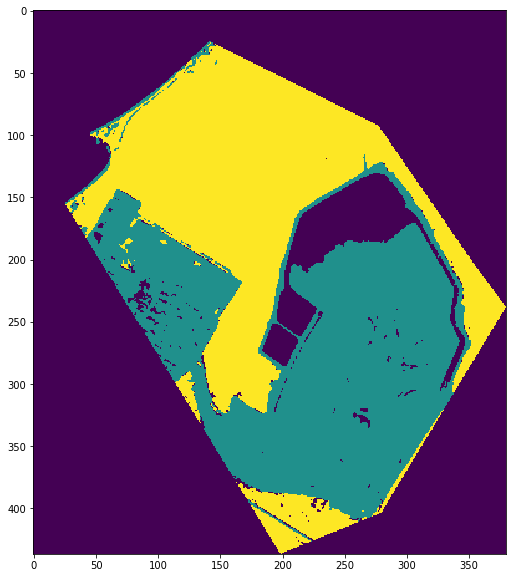

In [29]:
utils.plot_classified_image(test_image, model_s, BANDS_INDEX, figsize=(10,10))

## Teste 5 - Variação na forma de alteração dos pesos da rede (learning_rate)

In [30]:
classifier_lr = mlp.MLPClassifier(
    hidden_layer_sizes = (100, 100), 
    activation = "tanh",
    solver="adam",
    batch_size=41,
    learning_rate="invscaling",
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [31]:
model_lr = classifier_lr.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.44899851
Iteration 2, loss = 0.04409747
Iteration 3, loss = 0.02330378
Iteration 4, loss = 0.01871908
Iteration 5, loss = 0.01533233
Iteration 6, loss = 0.01424824
Iteration 7, loss = 0.01286197
Iteration 8, loss = 0.01250822
Iteration 9, loss = 0.01128188
Iteration 10, loss = 0.01097319
Iteration 11, loss = 0.01019777
Iteration 12, loss = 0.00937614
Iteration 13, loss = 0.00877664
Iteration 14, loss = 0.00973671
Iteration 15, loss = 0.00800573
Iteration 16, loss = 0.00776878
Iteration 17, loss = 0.00816913
Iteration 18, loss = 0.00736142
Iteration 19, loss = 0.00728400
Iteration 20, loss = 0.00772986
Iteration 21, loss = 0.00679205
Iteration 22, loss = 0.00637663
Iteration 23, loss = 0.00842610
Iteration 24, loss = 0.00584730
Iteration 25, loss = 0.00741625
Iteration 26, loss = 0.00757093
Iteration 27, loss = 0.00625605
Iteration 28, loss = 0.00695833
Iteration 29, loss = 0.00695562
Iteration 30, loss = 0.00709059
Iteration 31, loss = 0.00723997
Iteration 32, los

### Verifica acuracia da rede

In [32]:
score_result = model_lr.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.9968875055580257


### Tenta adivinhar quais pixels são agua e quais nao são

In [33]:
y_predict = model_lr.predict(X_test)

### Gera matriz de confusao

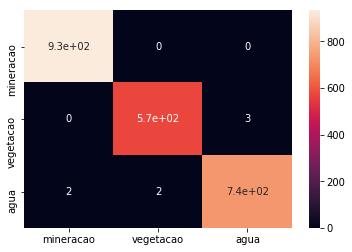

In [34]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


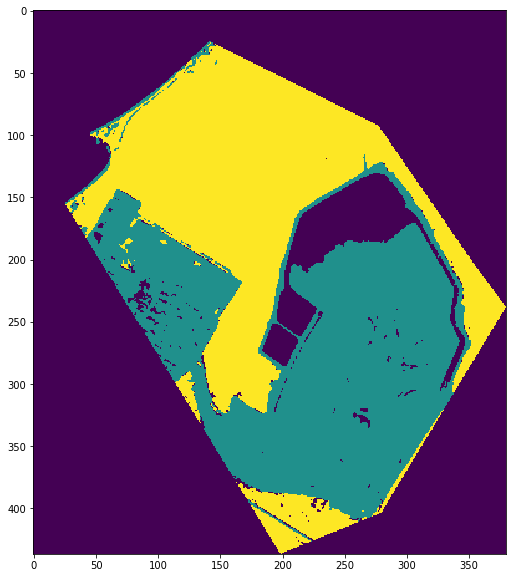

In [35]:
utils.plot_classified_image(test_image, model_lr, BANDS_INDEX, figsize=(10,10))

## Teste 6 - Variação das camadas ocultas (hidden_layer_sizes)

In [36]:
classifier_hls = mlp.MLPClassifier(
    hidden_layer_sizes = (100), 
    activation = "tanh",
    solver="adam",
    batch_size=41,
    learning_rate="adaptive",
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [37]:
model_hls = classifier_hls.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.88958843
Iteration 2, loss = 0.51437284
Iteration 3, loss = 0.25043166
Iteration 4, loss = 0.13013970
Iteration 5, loss = 0.07898334
Iteration 6, loss = 0.05524075
Iteration 7, loss = 0.04284733
Iteration 8, loss = 0.03537207
Iteration 9, loss = 0.03047549
Iteration 10, loss = 0.02723581
Iteration 11, loss = 0.02470444
Iteration 12, loss = 0.02280055
Iteration 13, loss = 0.02136032
Iteration 14, loss = 0.02008108
Iteration 15, loss = 0.01916337
Iteration 16, loss = 0.01809912
Iteration 17, loss = 0.01722906
Iteration 18, loss = 0.01678958
Iteration 19, loss = 0.01627467
Iteration 20, loss = 0.01576251
Iteration 21, loss = 0.01524128
Iteration 22, loss = 0.01475438
Iteration 23, loss = 0.01436551
Iteration 24, loss = 0.01384113
Iteration 25, loss = 0.01353334
Iteration 26, loss = 0.01308924
Iteration 27, loss = 0.01265549
Iteration 28, loss = 0.01248701
Iteration 29, loss = 0.01217070
Iteration 30, loss = 0.01188184
Iteration 31, loss = 0.01145010
Iteration 32, los

### Verifica acuracia da rede

In [38]:
score_result = model_hls.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.997332147621165


### Tenta adivinhar quais pixels são agua e quais nao são

In [39]:
y_predict = model_hls.predict(X_test)

### Gera matriz de confusao

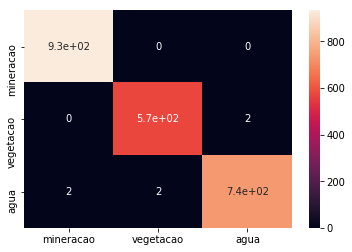

In [40]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


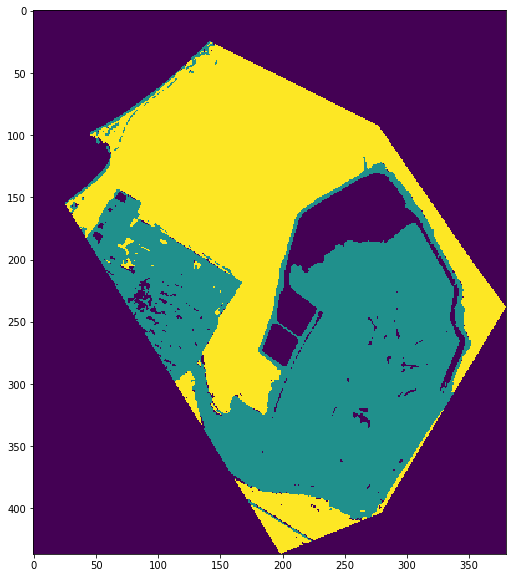

In [41]:
utils.plot_classified_image(test_image, model_hls, BANDS_INDEX, figsize=(10,10))

## Teste 7 - Variação na função de ativação e otimização (activation, solver)

In [42]:
classifier_as = mlp.MLPClassifier(
    hidden_layer_sizes = (100, 100), 
    activation = "identity",
    solver="adam",
    batch_size=41,
    learning_rate="adaptive",
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [43]:
model_as = classifier_as.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.44094672
Iteration 2, loss = 0.04329742
Iteration 3, loss = 0.02319724
Iteration 4, loss = 0.01873886
Iteration 5, loss = 0.01533837
Iteration 6, loss = 0.01434240
Iteration 7, loss = 0.01294066
Iteration 8, loss = 0.01261658
Iteration 9, loss = 0.01142025
Iteration 10, loss = 0.01106322
Iteration 11, loss = 0.01033564
Iteration 12, loss = 0.00946858
Iteration 13, loss = 0.00887107
Iteration 14, loss = 0.00995941
Iteration 15, loss = 0.00807148
Iteration 16, loss = 0.00789431
Iteration 17, loss = 0.00827530
Iteration 18, loss = 0.00748544
Iteration 19, loss = 0.00731928
Iteration 20, loss = 0.00780594
Iteration 21, loss = 0.00680418
Iteration 22, loss = 0.00649850
Iteration 23, loss = 0.00848010
Iteration 24, loss = 0.00591674
Iteration 25, loss = 0.00744127
Iteration 26, loss = 0.00762384
Iteration 27, loss = 0.00630881
Iteration 28, loss = 0.00694450
Iteration 29, loss = 0.00705405
Iteration 30, loss = 0.00717294
Iteration 31, loss = 0.00729927
Iteration 32, los

### Verifica acuracia da rede

In [44]:
score_result = model_as.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.9968875055580257


### Tenta adivinhar quais pixels são agua e quais nao são

In [45]:
y_predict = model_as.predict(X_test)

### Gera matriz de confusao

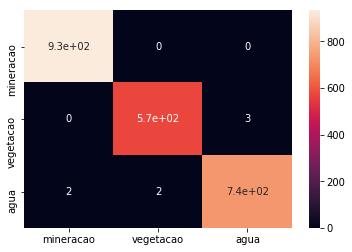

In [46]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


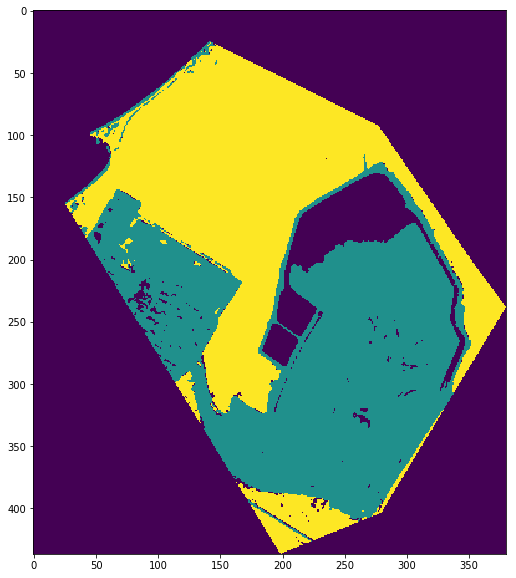

In [47]:
utils.plot_classified_image(test_image, model_as, BANDS_INDEX, figsize=(10,10))

## Teste 8 - Variação na forma de alteração dos pesos na rede e o número de camadas ocultas (learning_rate, hidden_layers_sizes)

In [48]:
classifier_lrhls = mlp.MLPClassifier(
    hidden_layer_sizes = (100), 
    activation = "identity", 
    solver="adam", 
    batch_size=41, 
    learning_rate="invscaling", 
    max_iter=200, 
    random_state=0, 
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [49]:
model_lrhls = classifier_lrhls.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.88721814
Iteration 2, loss = 0.50975407
Iteration 3, loss = 0.24749269
Iteration 4, loss = 0.12885271
Iteration 5, loss = 0.07842378
Iteration 6, loss = 0.05497812
Iteration 7, loss = 0.04272230
Iteration 8, loss = 0.03530134
Iteration 9, loss = 0.03044223
Iteration 10, loss = 0.02722833
Iteration 11, loss = 0.02470739
Iteration 12, loss = 0.02281314
Iteration 13, loss = 0.02137700
Iteration 14, loss = 0.02010367
Iteration 15, loss = 0.01919424
Iteration 16, loss = 0.01812158
Iteration 17, loss = 0.01725860
Iteration 18, loss = 0.01682442
Iteration 19, loss = 0.01631802
Iteration 20, loss = 0.01581347
Iteration 21, loss = 0.01528358
Iteration 22, loss = 0.01480632
Iteration 23, loss = 0.01441734
Iteration 24, loss = 0.01389546
Iteration 25, loss = 0.01359251
Iteration 26, loss = 0.01314582
Iteration 27, loss = 0.01271006
Iteration 28, loss = 0.01255622
Iteration 29, loss = 0.01224332
Iteration 30, loss = 0.01195745
Iteration 31, loss = 0.01152400
Iteration 32, los

### Verifica acuracia da rede

In [50]:
score_result = model_lrhls.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.997332147621165


### Tenta adivinhar quais pixels são agua e quais nao são

In [51]:
y_predict = model_lrhls.predict(X_test)

### Gera matriz de confusao

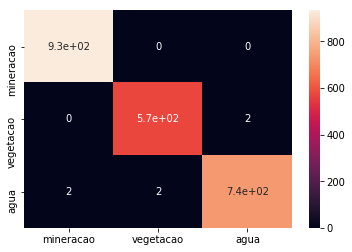

In [52]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


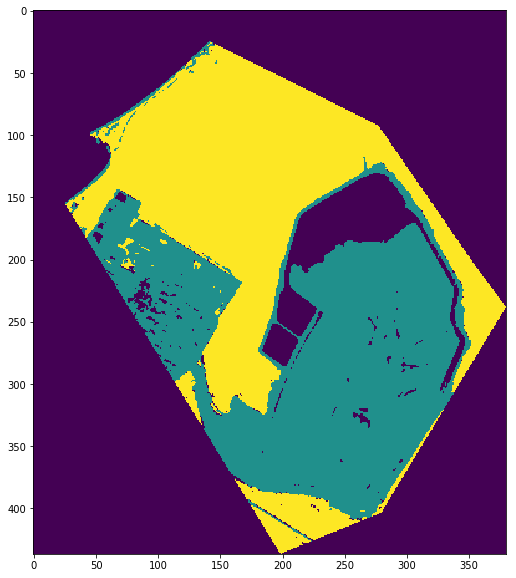

In [53]:
utils.plot_classified_image(test_image, model_lrhls, BANDS_INDEX, figsize=(10,10))

## Teste 9 - Variação na função de ativação e o número de camadas ocultas (activation, hidden_layer_sizes)

In [54]:
classifier_ahls = mlp.MLPClassifier(
    hidden_layer_sizes = (100, 100, 100),
    activation = "logistic",
    solver="sgd",
    batch_size=41,
    learning_rate="adaptive",
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [55]:
model_ahls = classifier_ahls.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.07638966
Iteration 2, loss = 1.07321722
Iteration 3, loss = 1.07255527
Iteration 4, loss = 1.07303305
Iteration 5, loss = 1.07270239
Iteration 6, loss = 1.07307331
Iteration 7, loss = 1.07236261
Iteration 8, loss = 1.07205531
Iteration 9, loss = 1.07289614
Iteration 10, loss = 1.07325643
Iteration 11, loss = 1.07268537
Iteration 12, loss = 1.07284251
Iteration 13, loss = 1.07312437
Iteration 14, loss = 1.07276762
Iteration 15, loss = 1.07329844
Iteration 16, loss = 1.07304998
Iteration 17, loss = 1.07265701
Iteration 18, loss = 1.07329595
Iteration 19, loss = 1.07274389
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 20, loss = 1.07183583
Iteration 21, loss = 1.07192908
Iteration 22, loss = 1.07207332
Iteration 23, loss = 1.07201107
Iteration 24, loss = 1.07203315
Iteration 25, loss = 1.07198759
Iteration 26, loss = 1.07197900
Iteration 27, loss = 1.07194429
Iteration 28, loss = 1.07199216

## Verifica acuracia da rede

In [56]:
score_result = model_ahls.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.4157403290351267


## Tenta adivinhar quais pixels são agua e quais nao são

In [57]:
y_predict = model_ahls.predict(X_test)

## Gera matriz de confusao

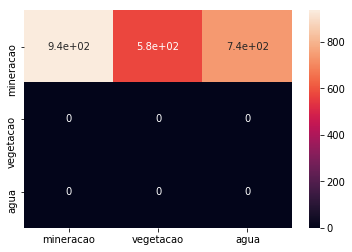

In [58]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


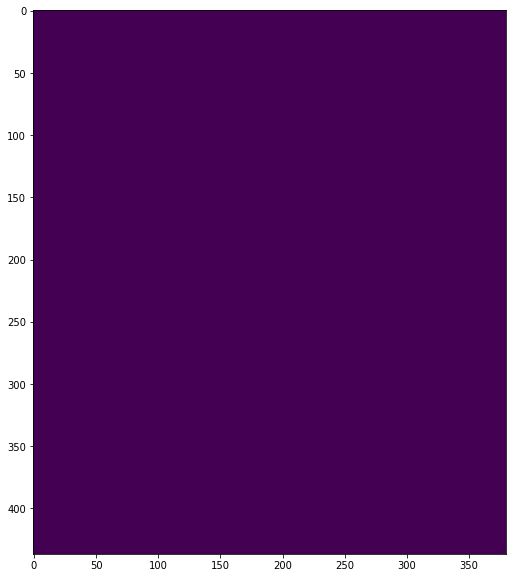

In [59]:
utils.plot_classified_image(test_image, model_ahls, BANDS_INDEX, figsize=(10,10))

## Teste 10 - Variação das camadas ocultas e número máximo de iterações (hidden_layer_sizes e solver)

In [60]:
classifier_hlss = mlp.MLPClassifier(
    hidden_layer_sizes = (50),
    activation = "tanh",
    solver="lbfgs",
    batch_size=41,
    max_iter=200,
    random_state=0,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [61]:
model_hlss = classifier_hlss.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Verifica acuracia da rede

In [62]:
score_result = model_hlss.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.9968875055580257


### Tenta adivinhar quais pixels são agua e quais nao são

In [63]:
y_predict = model_hlss.predict(X_test)

### Gera matriz de confusao

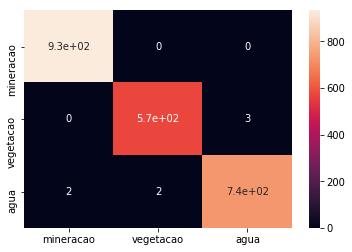

In [64]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


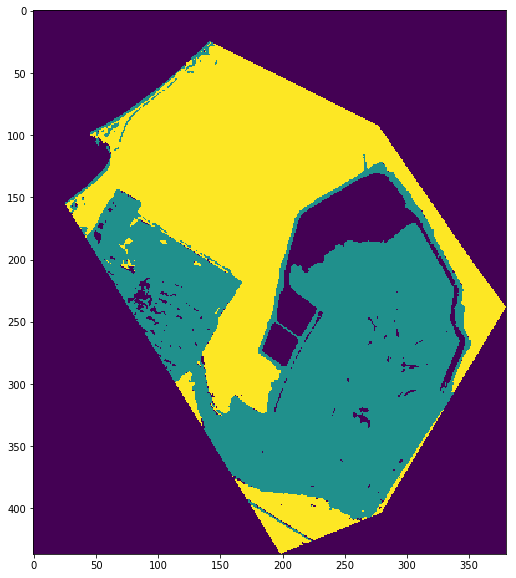

In [65]:
utils.plot_classified_image(test_image, model_hlss, BANDS_INDEX, figsize=(10,10))

## Teste 11 - Variação do random_state

In [66]:
classifier_rs = mlp.MLPClassifier(
    hidden_layer_sizes = (50),
    activation = "tanh",
    solver="lbfgs",
    batch_size=41,
    max_iter=100,
    random_state=50,
    verbose=True)

### Treina o modelo. Aprende com os dados e devolve um modelo generalizado para classificar imagens

In [67]:
model_rs = classifier_rs.fit(X_train, y_train)

/home/weslei/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Verifica acuracia da rede

In [68]:
score_result = model_rs.score(X_test, y_test)
print(f"MLP Accuracy: {score_result}")

MLP Accuracy: 0.997332147621165


### Tenta adivinhar quais pixels são agua e quais nao são

In [69]:
y_predict = model_rs.predict(X_test)

### Gera matriz de confusao

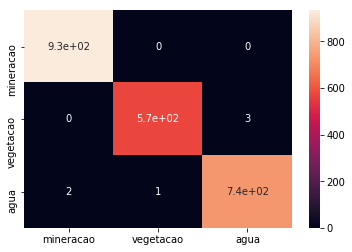

In [70]:
confusion_matrix_result = confusion_matrix(y_predict, y_test)

# cria dataframe com as classes definidas na constante CONFUSION_MATRIX_INDEX
data_frame_confusion_matrix = pd.DataFrame(confusion_matrix_result, index = CONFUSION_MATRIX_INDEX, columns = CONFUSION_MATRIX_INDEX )

# exibe figura
sn.heatmap(data_frame_confusion_matrix, annot=True)

### Visualizando classificação da rede com imagem de validação

Predicting data...
Preparing data for plot


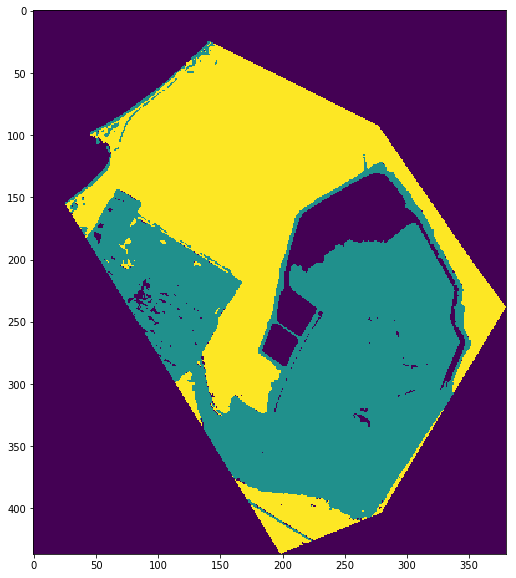

In [71]:
utils.plot_classified_image(test_image, model_rs, BANDS_INDEX, figsize=(10,10))

## Comparativo dos resultados dos testes

In [76]:
models = {
    "model_sklearn_default":model_sklearn_default, # Teste 1
    "model_default":model_default, # Teste 2
    "model_a":model_a, # Teste 3
    "model_s":model_s, # Teste 4
    "model_lr":model_lr, # Teste 5
    "model_hls":model_hls, # Teste 6
    "model_as":model_as, # Teste 7
    "model_lrhls":model_lrhls, # Teste 8
    "model_ahls":model_ahls, # Teste 9
    "model_hlss":model_hlss, # Teste 10
    "model_rs":model_rs, # Teste 11
}
utils.print_models_scores(*[X_test, y_test], models)

nome_modelo  acuracia
8              model_ahls  0.415740
1           model_default  0.995998
2                 model_a  0.995998
3                 model_s  0.996888
4                model_lr  0.996888
6                model_as  0.996888
9              model_hlss  0.996888
0   model_sklearn_default  0.997332
5               model_hls  0.997332
7             model_lrhls  0.997332
10               model_rs  0.997332

## Comparativo dos resultados de validação

In [73]:
dados_validacao = pd.DataFrame(test_crop_image["reshaped_image"], columns=BANDS_INDEX)
dados_validacao["classe"] = "mineracao"
utils.print_models_scores(*[dados_validacao[BANDS_INDEX], dados_validacao[CLASSES_INDEX]], models)

nome_modelo  acuracia
8              model_ahls  0.000000
1           model_default  0.976632
3                 model_a  0.976744
7             model_lrhls  0.979763
5               model_hls  0.979987
9              model_hlss  0.981105
0   model_sklearn_default  0.981887
2                 model_s  0.984682
4                model_lr  0.984682
6                model_as  0.985465
10               model_rs  0.992062

## Plots com os resultados obtidos

/home/weslei/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


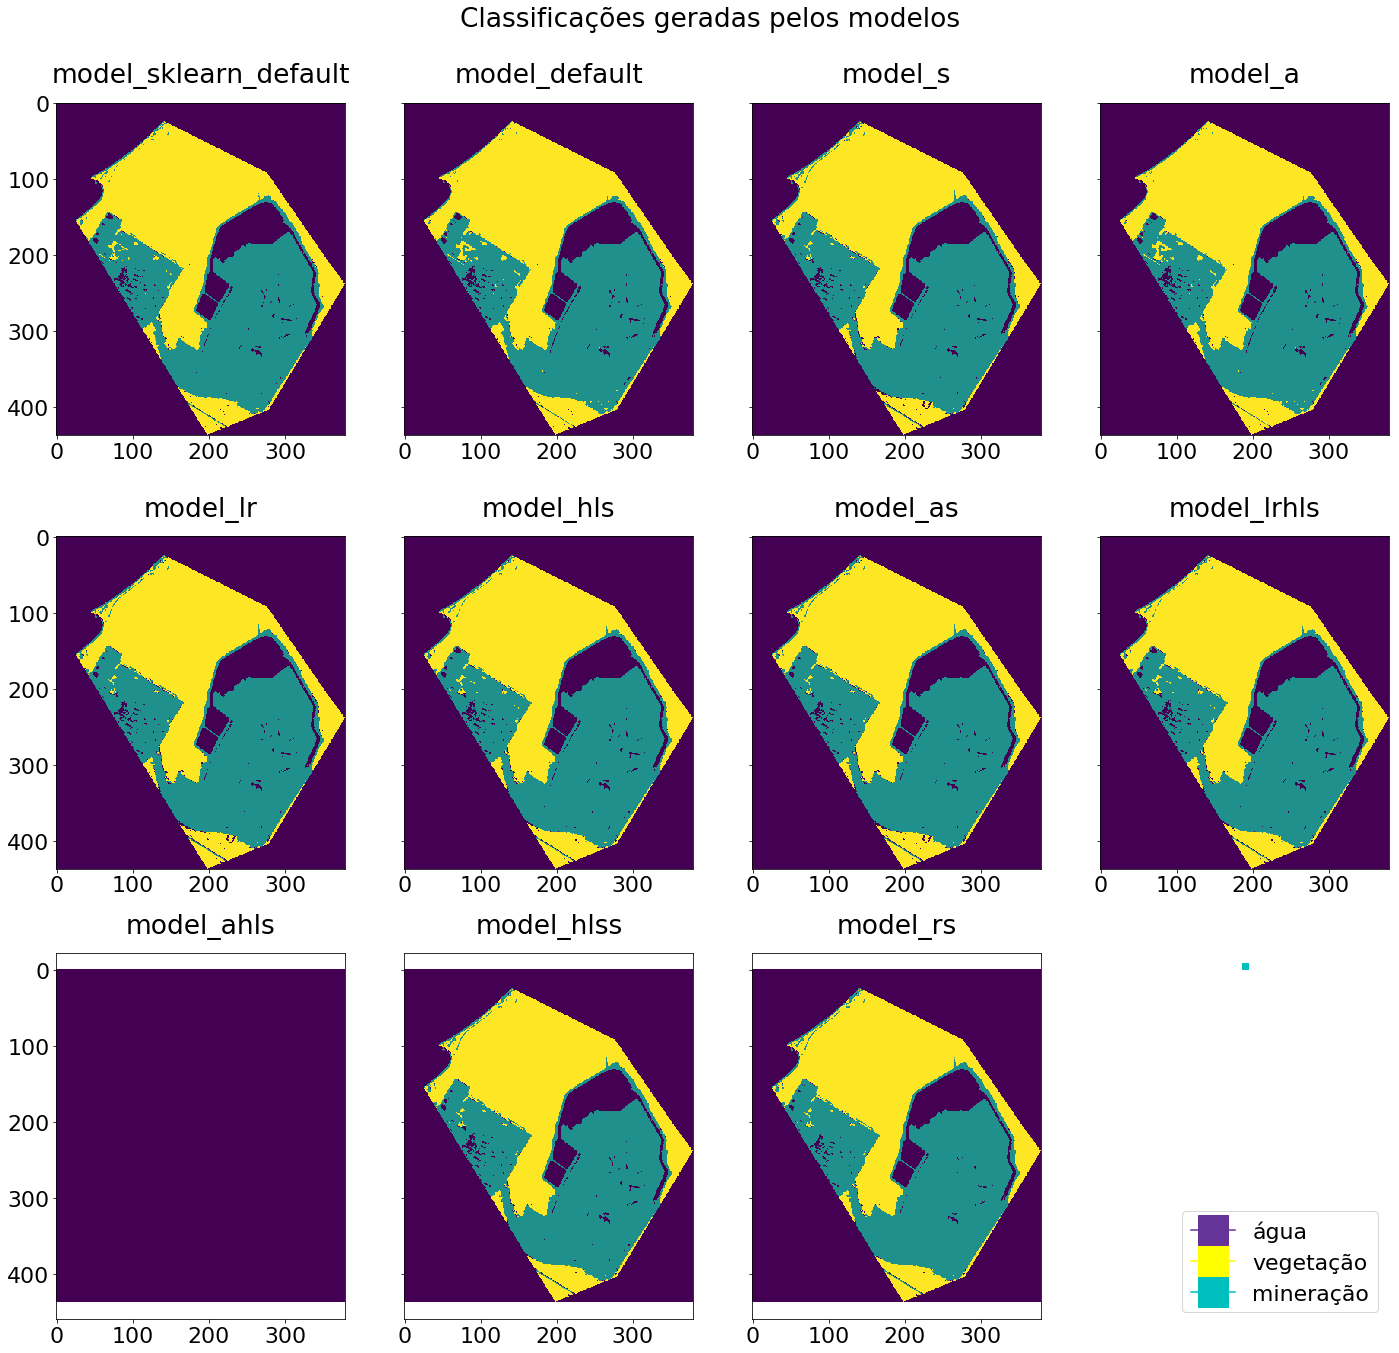

In [74]:
plt.rcParams.update({'font.size': 22, 'axes.titlepad': 20})
fig, ax = plt.subplots(3, 4, sharey='row',figsize=(20,20), constrained_layout=True)
x=0;y=0
df = pd.DataFrame(test_image["reshaped_image"], columns=BANDS_INDEX)
fig.suptitle("Classificações geradas pelos modelos")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
for model in models.keys():
    predicted_result = models[model].predict(df)
    labels_reshaped = utils.reshape_encode_labels(predicted_result, *test_image["original_image"].shape[0:2])
    ax[x][y].set_title(model)
    ax[x][y].imshow(labels_reshaped)
    
    if(y == 3):
        x += 1
        y = 0
    else:
        y += 1
        
ax[x][y].set_frame_on(False)
ax[x][y].get_xaxis().set_visible(False)
ax[x][y].get_yaxis().set_visible(False)
plt.plot(0, 0, marker='s', color='rebeccapurple', label = 'água')
plt.plot(0, 0, marker='s', color='yellow', label = 'vegetação')
plt.plot(0, 0, marker='s', color='c', label = 'mineração')
ax[x][y].legend(loc = 'lower right', markerscale=5)

## Salva a classificação do melhor modelo

In [75]:
df = pd.DataFrame(test_image["reshaped_image"], columns=BANDS_INDEX)
labels = model_rs.predict(df[BANDS_INDEX])
encoded_labels = utils.reshape_encode_labels(labels, *test_image["original_image"].shape[0:2])
utils.save_georef_labels(f"{IMAGE_VALIDATION}.tif", f"{IMAGE_VALIDATION}_resultado_classificacao.tif", encoded_labels)